# Web scrapping
***

> #### _Libraries Defination_

In [ ]:
import csv
import re  
import numpy as np
import time
import pandas as pd
import seaborn as sns
from selenium import webdriver
import matplotlib.pyplot as plt
from selenium.webdriver.common.by import By

> #### _Fetching Links of the products_
Store links of products according to file



In [ ]:


driver = webdriver.Chrome()

try:
    num_pages = 2

    for page in range(1, num_pages + 1): # directing To Next Page
        
        url = f"https://www.paklap.pk/laptops-prices/gaming-laptops.html?p={page}"
        # url = f"https://www.paklap.pk/laptops-prices/gaming-laptops.html"

        # url = 'https://www.mega.pk/laptop-msi/'
        # url = 'https://www.shophive.com/laptops-computers/laptops?c2c_backlit_keyboard=yes'
        # url = 'https://www.shophive.com/laptops-computers/laptops?c2c_backlit_keyboard=no'


        driver.get(url)
        # time.sleep(360)


        product_links = driver.find_elements(By.CSS_SELECTOR, 'a.product-item-photo')

        links = [link.get_attribute('href') for link in product_links if link.get_attribute('href')]

        with open('shohive_Links.csv', mode='a', newline='') as file:
            writer = csv.writer(file)

            for link in links:
                writer.writerow([link])
        # print(links)

    print("Product links have been saved to 'mega_pk_Links.csv'.")

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    driver.quit()

> #### _Read links from stored file_
 

In [202]:
Paklab_links = pd.read_csv("PakLab_Links.csv",header=None)

print(Paklab_links)


                                                     0
0    https://www.paklap.pk/lenovo-300e-chromebook-2...
1    https://www.paklap.pk/lenovo-yoga-500-14-6th-g...
2    https://www.paklap.pk/lenovo-thinkpad-l590-8th...
3    https://www.paklap.pk/lenovo-thinkpad-t495-amd...
4    https://www.paklap.pk/lenovo-thinkpad-l14-gen-...
..                                                 ...
191  https://www.paklap.pk/hp-victus-gaming-16-r007...
192  https://www.paklap.pk/acer-predator-helios-neo...
193  https://www.paklap.pk/dell-g16-7630-13th-gen-c...
194  https://www.paklap.pk/lenovo-legion-pro-5-14th...
195  https://www.paklap.pk/lenovo-yoga-pro-9-intel-...

[196 rows x 1 columns]


> #### _Scrap file by reading links Files One by One and Fetch All product Details_
 

In [ ]:

driver = webdriver.Chrome()
#------------------------------------------------------------------------------------------

data_file = 'PakLab_Links.csv'  # Replace with your actual CSV file
#------------------------------------------------------------------------------------------

links = []
with open(data_file, mode='r', newline='', encoding='utf-8') as file:
    reader = csv.reader(file)
    for row in reader:
        if row:  # Check if the row is not empty
            links.append(row[0])  # Assuming links are in the first column

all_product_specs = []


count = 0
for url in links:
    if count ==3:
        break
    driver.get(url)

    try:
        product_data = []
        
        try:
# ___________________________________________________________________________________
#             Price = driver.find_element(By.CLASS_NAME, "product-price").text
            Spec_1 = driver.find_element(By.CLASS_NAME, "Value").text
#-----------------------------------------------------------------------------------
            Spec_1 = re.sub(r'[^\d]', '', Spec_1) 
        except:
            Spec_1 = "Spec 1 Not Available"
        product_data.append(f"{Spec_1}")

        Rows = driver.find_elements(By.ID, 'navigator')

        for Row in Rows:
            cells = Row.find_elements(By.CSS_SELECTOR, "h1.nav-h1")
        
        if len(cells) > 0: 
            product_data.append(cells[0].text.strip())  

        full_title = Row.text.strip().replace("\n", " ")  
        product_data.append(full_title)  



        rows = driver.find_elements(By.TAG_NAME, "tr")
        for row in rows:
            cells = row.find_elements(By.TAG_NAME, "td")
            if len(cells) > 1: 
                value = cells[1].text.strip()
                if value:
                    product_data.append(value)

        if product_data:
            all_product_specs.append(product_data)

    except Exception as e:
        print(f"Error extracting data from {url}: {e}")

    print(f"Processed URL: {url} - Total product specs found: {len(product_data)}")
    count +=1
 

driver.quit()


max_columns = max(len(spec) for spec in all_product_specs)

column_names = [f"Spec {i + 1}" for i in range(max_columns - 1)]  

output_file = 'mega_Data.csv'
with open(output_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(column_names)

    for product_specs in all_product_specs:
        writer.writerow(product_specs + [''] * (max_columns - len(product_specs)))

print(f"Data saved to {output_file}")


> # __Data Preprocessing__

In [ ]:
paklab_data = pd.read_csv('PakLab_Data.csv')
paklab_data.columns

Index(['Price', 'Brand', 'Processor Generation', 'Processor Type',
       'Processor Speed', 'Installed RAM', 'Type of memory', 'Internal Memory',
       'Hard drive speed', 'Optical drive', 'Type of optical drive', 'SSD',
       'Type of harddrive', 'Graphic Series', 'Dedicated graphics',
       'Graphic memory', 'Type of graphic memory', 'Switchable graphics',
       'Graphics processor', 'Backlight', 'Screen size', 'Screeen surface',
       'Screen Resolution', 'TouchScreen', 'Color', 'RAM', 'Operating system',
       'Weight', 'Finger Print Reader', 'Backlit keyboard', 'Numeric keyboard',
       'Bluetooth', 'LAN', 'Speed', 'Wireless/WIFI', 'Type', 'Condition',
       'USB', 'HDMI'],
      dtype='object')

Pak_lab

Add Headers

In [205]:
# Assign new column names
PakLab_headers = [
    'Price','Brand', 'Processor Generation', 'Processor Type', 'Processor Speed', 'Installed RAM', 'Type of memory', 
    'Internal Memory','Hard drive speed', 'Optical drive', 'Type of optical drive', 'SSD', 'Type of harddrive', 'Graphic Series', 'Dedicated graphics', 'Graphic memory',
    'Type of graphic memory', 'Switchable graphics', 'Graphics processor', 'Backlight', 'Screen size','Screeen surface', 'Screen Resolution',
    'TouchScreen', 'Color', 'RAM', 'Operating system','Weight', 'Finger Print Reader', 'Backlit keyboard',
    'Numeric keyboard', 'Bluetooth', 'LAN', 'Speed', 'Wireless/WIFI', 'Type', 'Condition','USB','HDMI'
]
# Ensure the number of columns matches
print(f'Columns: {len(PakLab_headers)}')

Columns: 39


In [206]:
# Assign new column names
paklab_data.columns = PakLab_headers

# Check the first few rows to ensure everything is aligned
paklab_data.head(5)

,Price,Brand,Processor Generation,Processor Type,Processor Speed,Installed RAM,Type of memory,Internal Memory,Hard drive speed,Optical drive,...,Backlit keyboard,Numeric keyboard,Bluetooth,LAN,Speed,Wireless/WIFI,Type,Condition,USB,HDMI
0,229000,Lenovo,13th Generation,i3 1305u Raptor Lake Processor (10 MB Intel Sm...,"1.6 GHz Boost up to 4.5 GHz (Total Cores 5, # ...",08 GB,"8GB Soldered LPDDR5-4800, not upgradable",256GB SSD M.2 2242 PCIe® 4.0x4 NVMe®,-,No,...,Yes,"Non-backlit, English (EU)",BT5.1,No,-,Yes,"Wi-Fi® 6, 11ax 2x2",New,2x USB 3.2 Gen 1 1x USB-C® 3.2 Gen 1 (support ...,1x HDMI® 1.4
1,559000,Dell,12th Generation,i3-1215U Alder Lake (10 MB Cache),1.2 GHz up to 4.4 GHz with Intel® Turbo Boost ...,8-GB,"DDR4, 3200MHz",512 GB PCIe® NVMe™ M.2 SSD,-,No,...,Yes,English International Non-Backlit Keyboard,Yes,Yes,1 RJ45 Ethernet port (flip-down),Yes,802.11ac 1x1 WiFi,New,Ports 2 USB 3.2 Gen 1 port 1 USB 2.0 port,1 HDMI 1.4 port
2,649000,Hp,13th Generation,i3-1315U Raptor Lake (10 MB Cache),1.2 GHz up to 4.5 GHz with Intel® Turbo Boost ...,4 GB,4 GB DDR4-3200 MHz RAM (1 x 4 GB),256 GB PCIe® NVMe™ M.2 SSD,-,No,...,Yes,Yes,BT 5.3,No,-,Yes,MediaTek Wi-Fi 6E MT7902 (1x1),New,1 USB Type-C® 5Gbps signaling rate (supports d...,1 HDMI 1.4b
3,699000,Lenovo,13th Generation,i3 1305u Raptor Lake Processor (10 MB Intel Sm...,"1.6 GHz Boost up to 4.5 GHz (Total Cores 5, # ...",8 GB,"8GB soldered memory, not upgradable",256GB SSD M.2 2242 PCIe® 4.0x4 NVMe®,-,No,...,Yes,"Non-backlit, English (UK)",BT 5.2,No,-,Yes,"Wi-Fi® 6, 802.11ax 2x2",New,2x USB 3.2 Gen 1 1x USB-C® 3.2 Gen 1 (support ...,1x HDMI® 1.4
4,699000,Lenovo,13th Generation,i3-1315U Raptor Lake (10 MB Cache),1.2 GHz up to 4.5 GHz with Intel® Turbo Boost ...,8-GB,"8GB Soldered DDR4-3200, (8GB soldered + 8GB SO...",256GB SSD M.2 2242 PCIe® 4.0x4 NVMe®,-,No,...,Yes,"Non-backlit, English (UK)",BT5.2,Yes,100/1000M (RJ-45),Yes,"Wi-Fi® 6, 802.11ax 2x2",New,1x USB 2.0 1x USB 3.2 Gen 1 1x USB-C® 3.2 Gen ...,1x HDMI® 1.4b


>## Removing Unwanted Columns

In [207]:
paklab_data = paklab_data.drop(paklab_data.columns[39:], axis=1) 

Unwanted_columns = ['RAM','Type of memory','Type of harddrive','Optical drive','Type of optical drive'
                    ,'Dedicated graphics','Type of graphic memory','Backlight','Screen size','Screeen surface','Numeric keyboard','Speed',
                    'Graphics processor','Graphic memory','Internal Memory','Hard drive speed','Switchable graphics','Operating system','Bluetooth','Type','Wireless/WIFI','USB','HDMI','Condition']

paklab_data=paklab_data.drop(columns=Unwanted_columns)

In [208]:
paklab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 144 non-null    int64 
 1   Brand                 144 non-null    object
 2   Processor Generation  144 non-null    object
 3   Processor Type        144 non-null    object
 4   Processor Speed       144 non-null    object
 5   Installed RAM         144 non-null    object
 6   SSD                   144 non-null    object
 7   Graphic Series        144 non-null    object
 8   Screen Resolution     144 non-null    object
 9   TouchScreen           144 non-null    object
 10  Color                 144 non-null    object
 11  Weight                144 non-null    object
 12  Finger Print Reader   144 non-null    object
 13  Backlit keyboard      144 non-null    object
 14  LAN                   144 non-null    object
dtypes: int64(1), object(14)
memory usage: 17

In [209]:
print(list(paklab_data))

['Price', 'Brand', 'Processor Generation', 'Processor Type', 'Processor Speed', 'Installed RAM', 'SSD', 'Graphic Series', 'Screen Resolution', 'TouchScreen', 'Color', 'Weight', 'Finger Print Reader', 'Backlit keyboard', 'LAN']


># Price

In [210]:
paklab_data['Price'].unique()

array([229000, 559000, 649000, 699000, 700000, 749000, 799000, 849000,
       869000, 899000, 929000, 100000, 101900, 102900, 106900, 107900,
       109900, 114900, 119900, 124900, 137900, 154900, 199900, 219900,
       244900, 254900, 284900, 294900, 108900, 112900, 115000, 117000,
       122900, 136900, 143000, 143900, 144900, 146500, 148000, 150000,
       151000, 203999, 245000, 329900, 344999, 385000, 155000, 159900,
       160000, 166900, 170000, 174900, 175900, 177000, 178000, 182900,
       184900, 185000, 188000, 193000, 195000, 202900, 203000, 205000,
       206900, 208000, 218000, 224900, 225000, 226900, 228000, 228900,
       228999, 229900, 236900, 240000, 248000, 255000, 257900, 259999,
       270000, 274900, 275000, 277000, 287000, 305000, 317900])

In [211]:
# Function to fix the price by keeping the first 6 digits
def fix_price(Price):
    if isinstance(Price, (int,float)):    
        price_str = str(Price)  
        if len(price_str) > 6:  
            return int(price_str[:6])  
        return Price  
    return Price
# Apply the function to the 'Price' column
paklab_data['Price'] = paklab_data['Price'].apply(fix_price)


In [212]:
paklab_data['Price'].unique()

array([229000, 559000, 649000, 699000, 700000, 749000, 799000, 849000,
       869000, 899000, 929000, 100000, 101900, 102900, 106900, 107900,
       109900, 114900, 119900, 124900, 137900, 154900, 199900, 219900,
       244900, 254900, 284900, 294900, 108900, 112900, 115000, 117000,
       122900, 136900, 143000, 143900, 144900, 146500, 148000, 150000,
       151000, 203999, 245000, 329900, 344999, 385000, 155000, 159900,
       160000, 166900, 170000, 174900, 175900, 177000, 178000, 182900,
       184900, 185000, 188000, 193000, 195000, 202900, 203000, 205000,
       206900, 208000, 218000, 224900, 225000, 226900, 228000, 228900,
       228999, 229900, 236900, 240000, 248000, 255000, 257900, 259999,
       270000, 274900, 275000, 277000, 287000, 305000, 317900])

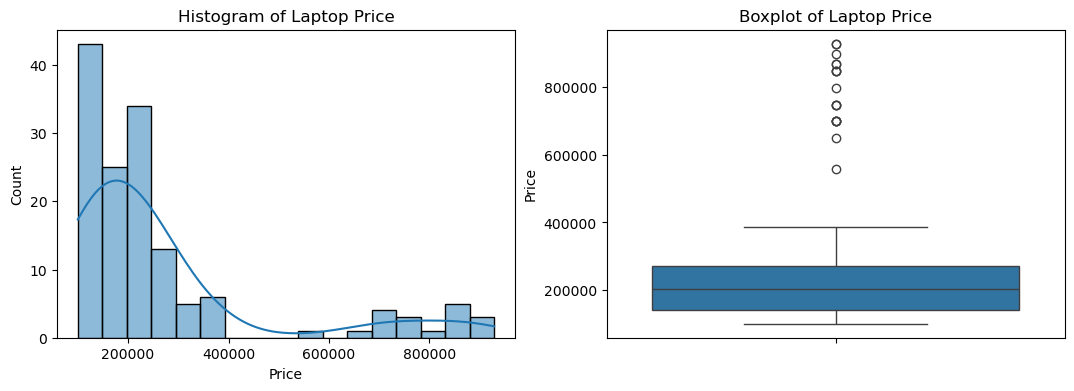

In [213]:

paklab_data['Price'] =paklab_data['Price'].astype(int)


plt.figure(figsize=(13,4 ))
plt.subplot(1, 2, 1)
sns.histplot(paklab_data['Price'], kde=True)
plt.title(f'Histogram of Laptop Price')

plt.subplot(1, 2, 2)
sns.boxplot(paklab_data['Price'])
plt.title(f'Boxplot of Laptop Price')
plt.show()

>## Brand

In [214]:
paklab_data['Brand'].unique()

array(['Lenovo', 'Dell', 'Hp', 'Asus', 'Acer', 'Microsoft'], dtype=object)

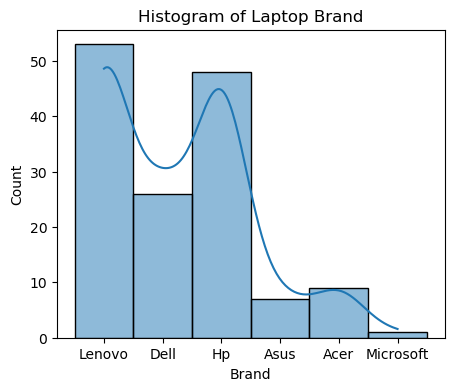

In [215]:
plt.figure(figsize=(5,4))
sns.histplot(paklab_data['Brand'], kde=True)
plt.title(f'Histogram of Laptop Brand')
plt.show()

>## Processor Generation

In [216]:
paklab_data['Processor Generation'].unique()

array(['13th Generation', '12th Generation', 'AMD', 'Intel Core Ultra 5',
       '14th Generation', 'Intel Core Ultra 7'], dtype=object)

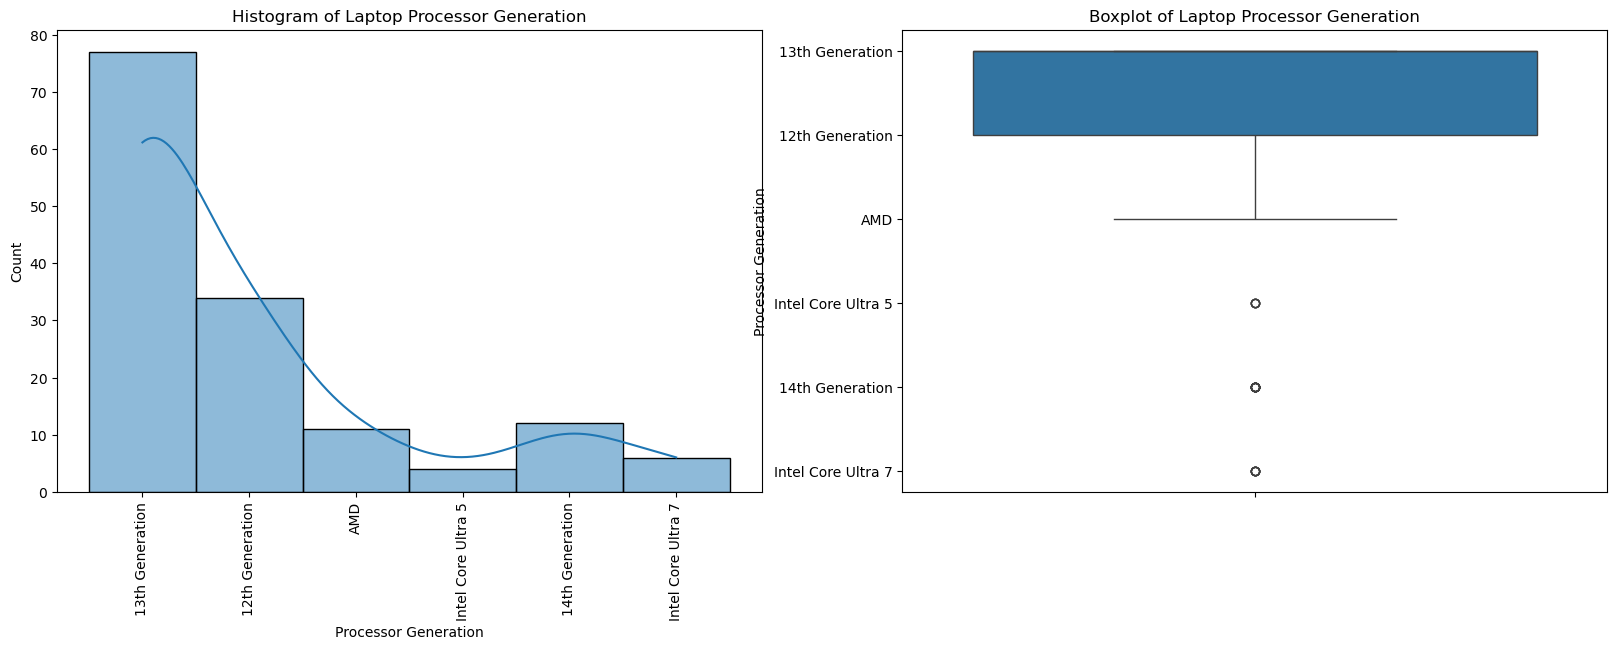

In [217]:
plt.figure(figsize=(20,6 ))
plt.subplot(1, 2, 1)
plt.xticks(rotation=90, ha='center', va='top', fontsize=10)  # Adjust alignment
sns.histplot(paklab_data['Processor Generation'], kde=True)
plt.title(f'Histogram of Laptop Processor Generation')

plt.subplot(1, 2, 2)
sns.boxplot(paklab_data['Processor Generation'])
plt.title(f'Boxplot of Laptop Processor Generation')
plt.show()

> ## Processor Type

In [218]:
paklab_data['Processor Type'].unique()


array(['i3 1305u Raptor Lake Processor (10 MB Intel Smart Cache)',
       'i3-1215U Alder Lake (10 MB Cache)',
       'i3-1315U Raptor Lake (10 MB Cache)',
       'i5-1235U Processor (10 Cores, 12 Threads)', 'i5 1235u Processor',
       'i5-1235u Processor (10 Cores - 12 Threads)',
       'i5 1335u Raptor Lake Processor (12 MB Intel Smart Cache)',
       'i5 1334u Raptor Lake Processor (12 MB Intel Smart Cache)',
       'AMD Ryzen™ 5 5625U (# of CPU Cores 6 # of Threads 12)',
       'i5 13420H Raptor Lake Processor (12 MB Intel Smart Cache)',
       'i5-12450H Processor (8 Cores - 12 Threads)',
       'i7 13650HX Processor',
       'i9 13900HX Raptor Lake Processor (36 MB Intel Smart Cache)',
       'AMD Ryzen™ Z1 Processor ("Zen4" architecture with 4nm processor)',
       'i7 13620H Raptor Lake Processor (24 MB Intel Smart Cache)',
       'i7 1355u Raptor Lake Processor (12 MB Intel Smart Cache)',
       'i7-1255u Processor (12 MB Cache)',
       'AMD Ryzen 5 7535HS HexaCore Processor

In [219]:

def extract_after_I_Processor_Type(text):
    if isinstance(text, str):  # Ensure it's a string
        # Step 1: Transform i-series processors (i3, i5, i7, i9) to "Intel Core i3", "Intel Core i5", etc.
        text_with_intel_core = re.sub(r'\bi([3579])\b', r'Intel Core i\1', text)
        
        # Step 2: Clean up version numbers or extra details after the processor name
        cleaned_text = re.sub(r'(\bIntel Core i[3579])[\w-]*', r'\1', text_with_intel_core)
        
        # Step 3: Use regex to find "Intel Core i3", "i5", etc., or AMD Ryzen, or Intel Core Ultra
        match = re.search(r'\b(?:Intel\sCore\s(?:i[3579])[\w-]*|AMD\sRyzen™\s?[1-9]?\s?\d*|AMD\sRyzen\s?[1-9]?\s?\d*|Intel®\sCore™\sUltra\s?[1-9])\b', cleaned_text, re.IGNORECASE)

        if match:
            return match.group()  # Return the matched text (transformed and cleaned)
    return text  # Return the original value if no match is found or not a string


# Example usage
paklab_data['Processor Type'] = paklab_data['Processor Type'].apply(extract_after_I_Processor_Type)
paklab_data['Processor Type'].head(20)


0     Intel Core i3
1     Intel Core i3
2     Intel Core i3
3     Intel Core i3
4     Intel Core i3
5     Intel Core i3
6     Intel Core i3
7     Intel Core i5
8     Intel Core i5
9     Intel Core i5
10    Intel Core i5
11    Intel Core i5
12    AMD Ryzen™ 5 
13    Intel Core i5
14    Intel Core i5
15    Intel Core i5
16    Intel Core i3
17    Intel Core i3
18    Intel Core i3
19    Intel Core i5
Name: Processor Type, dtype: object

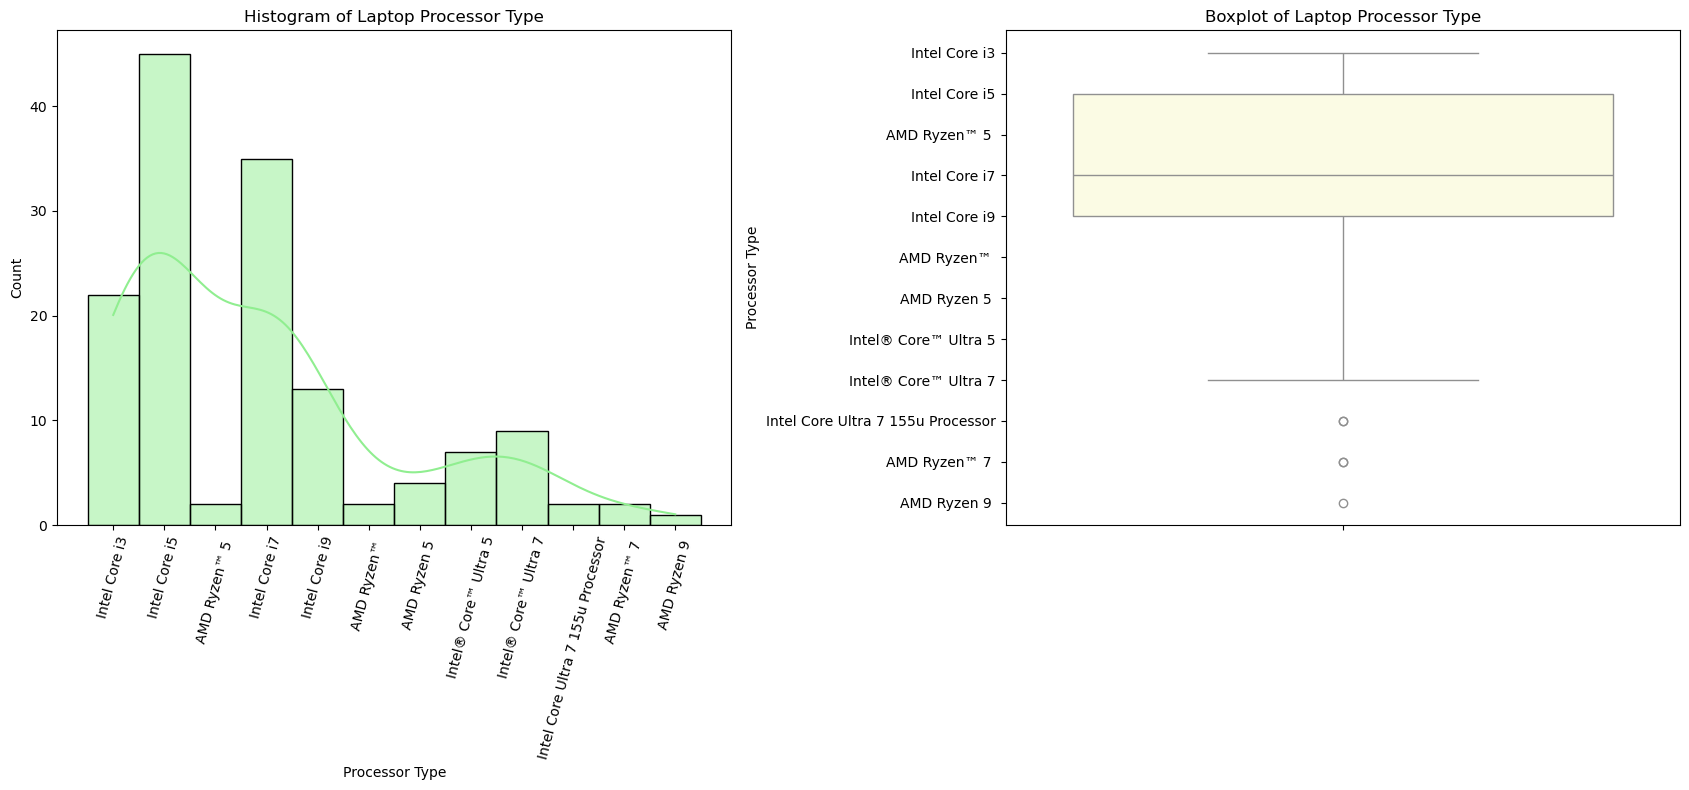

In [220]:
plt.figure(figsize=(17,8 ))
plt.subplot(1, 2, 1)
sns.histplot(paklab_data['Processor Type'], kde=True,color='lightgreen')
plt.xticks(rotation=75, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title(f'Histogram of Laptop Processor Type')

plt.subplot(1, 2, 2)
sns.boxplot(paklab_data['Processor Type'],color='lightyellow')
plt.title(f'Boxplot of Laptop Processor Type')
plt.tight_layout()
plt.show()

> ## Processor Speed

In [221]:
paklab_data['Processor Speed'].unique()

array(['1.6 GHz Boost up to 4.5 GHz (Total Cores 5, # of Performance-cores 1, # of Efficient-cores 4 , Total Threads 6)',
       '1.2 GHz up to 4.4 GHz with Intel® Turbo Boost Technology (6 cores, 8 threads)',
       '1.2 GHz up to 4.5 GHz with Intel® Turbo Boost Technology (Total Cores 6 # of Performance-cores 2 # of Efficient-cores 4, 8 Threads)',
       '1.30 GHz up to 4.40 GHz Turbo (12.0 MB Cache)',
       '1.3 GHz Boost up to 4.6 GHz (Total Cores 10, # of Performance-cores 2, # of Efficient-cores 8, Total Threads 12)',
       '2.3 GHz Boost Up to 4.3 GHz (16 MB L3 Cache)',
       '1.5 GHz Boost up to 3.4 GHz (Total Cores 8, # of Performance-cores 4, # of Efficient-cores 4, Total Threads 12)',
       '2.0 GHz Turbo Boost up to 4.4 GHz (12 MB Cache)',
       '2.1 Ghz Boost up to 4.6 Ghz (Total Cores 8, # of Performance-cores 4, # of Efficient 4, Total Threads 12)',
       '3.60 Ghz Turbo Boost upto 4.90 Ghz (14 Cores - 20 Threads, 24 MB Intel® Smart Cache)',
       '2.2 GHz Boost u

In [222]:

# Function to extract text after "I" followed by a digit
def extract_floets_point_Processor_speed(text):
    if isinstance(text, str):  # Ensure it's a string
        # Use regex to find "I" followed by a digit and the rest of the text
        match = re.search(r'\d+\.\d+\s*', text)  # Case-insensitive match for "I"
        if match:
            return match.group()  # Return the matched text
    return text  # Return the original value if no match is found or not a string

# Example usage
paklab_data['Processor Speed'] = paklab_data['Processor Speed'].apply(extract_floets_point_Processor_speed)
paklab_data['Processor Speed'].head(25)

0      1.6 
1      1.2 
2      1.2 
3      1.6 
4      1.2 
5      1.2 
6      1.2 
7     1.30 
8     1.30 
9     1.30 
10     1.3 
11     1.3 
12     2.3 
13     1.3 
14     1.5 
15     1.3 
16     1.2 
17     1.6 
18     1.2 
19    1.30 
20     1.3 
21     2.0 
22     2.1 
23    3.60 
24    3.60 
Name: Processor Speed, dtype: object

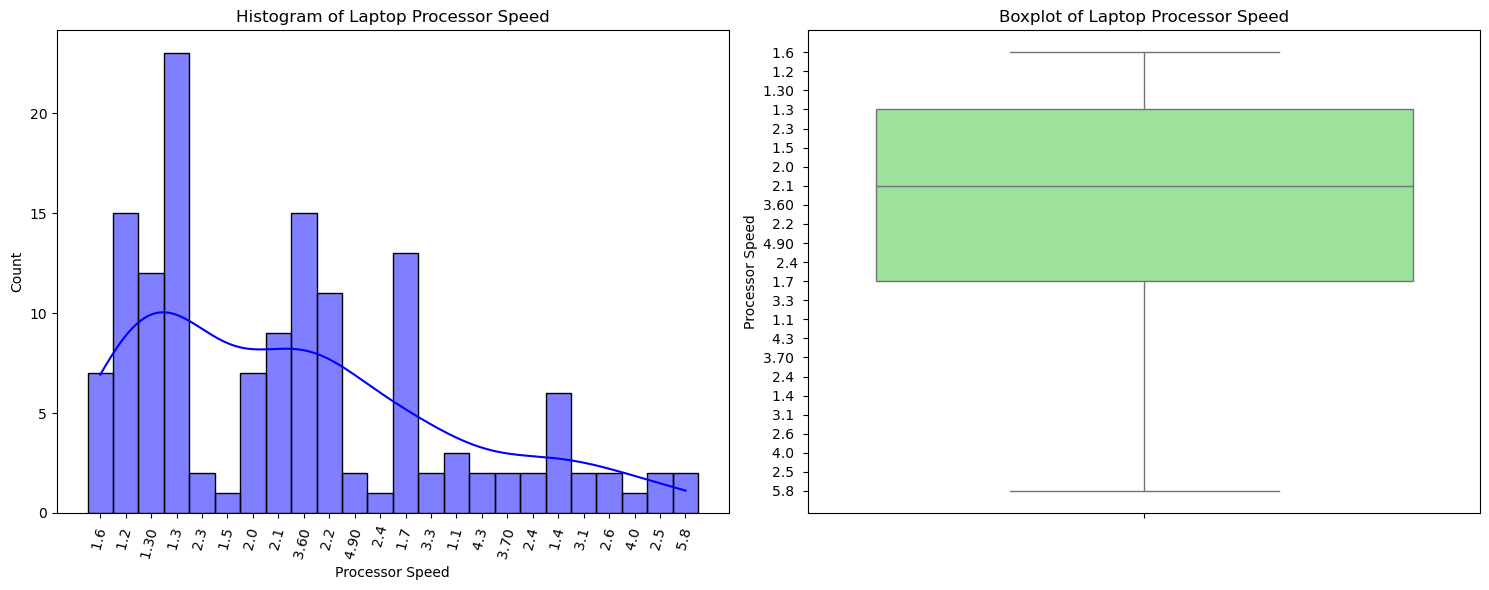

In [223]:
plt.figure(figsize=(15, 6))

# First subplot: Histogram with KDE and styling
plt.subplot(1, 2, 1)
sns.histplot(paklab_data['Processor Speed'], kde=True, color="blue",  edgecolor="black" ) # Add edge color for better visualization

plt.xticks(rotation=75, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title('Histogram of Laptop Processor Speed')

# Second subplot: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(paklab_data['Processor Speed'], color="lightgreen")  # Add color to the boxplot
plt.title('Boxplot of Laptop Processor Speed')

plt.tight_layout()
plt.show()


>## Installed RAM

In [224]:
paklab_data['Installed RAM'].unique()

array(['08 GB', '8-GB', '4 GB', '8 GB', '8GB', '16GB', '24 GB', '16 GB',
       '1x 8GB SO-DIMM DDR5-5200', '08 GB (Soldered)',
       '8GB Soldered DDR4-3200', '32 GB'], dtype=object)

In [225]:
paklab_data['Installed RAM'].head(25)

0     08 GB
1      8-GB
2      4 GB
3      8 GB
4      8-GB
5      8-GB
6      8 GB
7      8 GB
8       8GB
9      8 GB
10     8 GB
11     8 GB
12      8GB
13     8 GB
14     8-GB
15     8-GB
16     8-GB
17    08 GB
18     4 GB
19     8 GB
20     8 GB
21     8 GB
22     8-GB
23     16GB
24    24 GB
Name: Installed RAM, dtype: object

In [226]:

paklab_data['Installed RAM'] = paklab_data['Installed RAM'].astype(str).str.extract(r'(\d+)').astype(int)  # Extract numbers and convert to float
paklab_data['Installed RAM']


0       8
1       8
2       4
3       8
4       8
       ..
139    16
140    16
141    16
142    32
143    16
Name: Installed RAM, Length: 144, dtype: int64

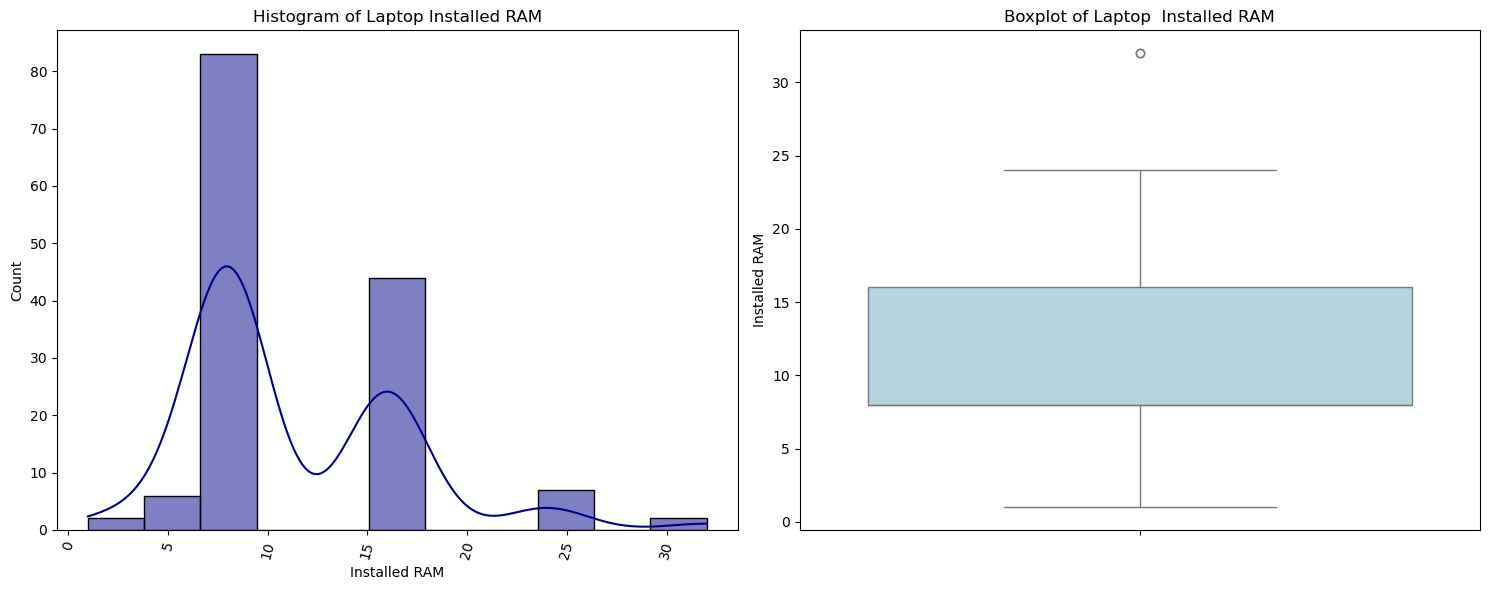

In [227]:
plt.figure(figsize=(15, 6))

# First subplot: Histogram with KDE and styling
plt.subplot(1, 2, 1)
sns.histplot(paklab_data['Installed RAM'], kde=True, color="darkblue",  edgecolor="black" ) # Add edge color for better visualization

plt.xticks(rotation=75, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title('Histogram of Laptop Installed RAM')

# Second subplot: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(paklab_data['Installed RAM'], color="lightblue")  # Add color to the boxplot
plt.title('Boxplot of Laptop  Installed RAM')

plt.tight_layout()
plt.show()


>## SSD/ Storage capacity

In [228]:
paklab_data['SSD']

0      256 GB SSD
1      512 GB SSD
2      256 GB SSD
3      256 GB SSD
4      256 GB SSD
          ...    
139    512 GB SSD
140      1 TB SSD
141      1 TB SSD
142      1 TB SSD
143      1 TB SSD
Name: SSD, Length: 144, dtype: object

In [229]:
paklab_data['SSD'].isnull().sum()

0

In [230]:
paklab_data['SSD'] = paklab_data['SSD'].astype(str).str.extract(r'(\d+)').astype(int)  # Extract numbers and convert to float
paklab_data['SSD']

0      256
1      512
2      256
3      256
4      256
      ... 
139    512
140      1
141      1
142      1
143      1
Name: SSD, Length: 144, dtype: int64

In [231]:
paklab_data['SSD'] = paklab_data['SSD'].astype(str).str.extract(r'(\d+)').astype(int)  # Extract numbers and convert to float
paklab_data['SSD'] = paklab_data['SSD'].apply(lambda x:x * 1024 if x < 256 else x)
paklab_data['SSD'] 

0       256
1       512
2       256
3       256
4       256
       ... 
139     512
140    1024
141    1024
142    1024
143    1024
Name: SSD, Length: 144, dtype: int64

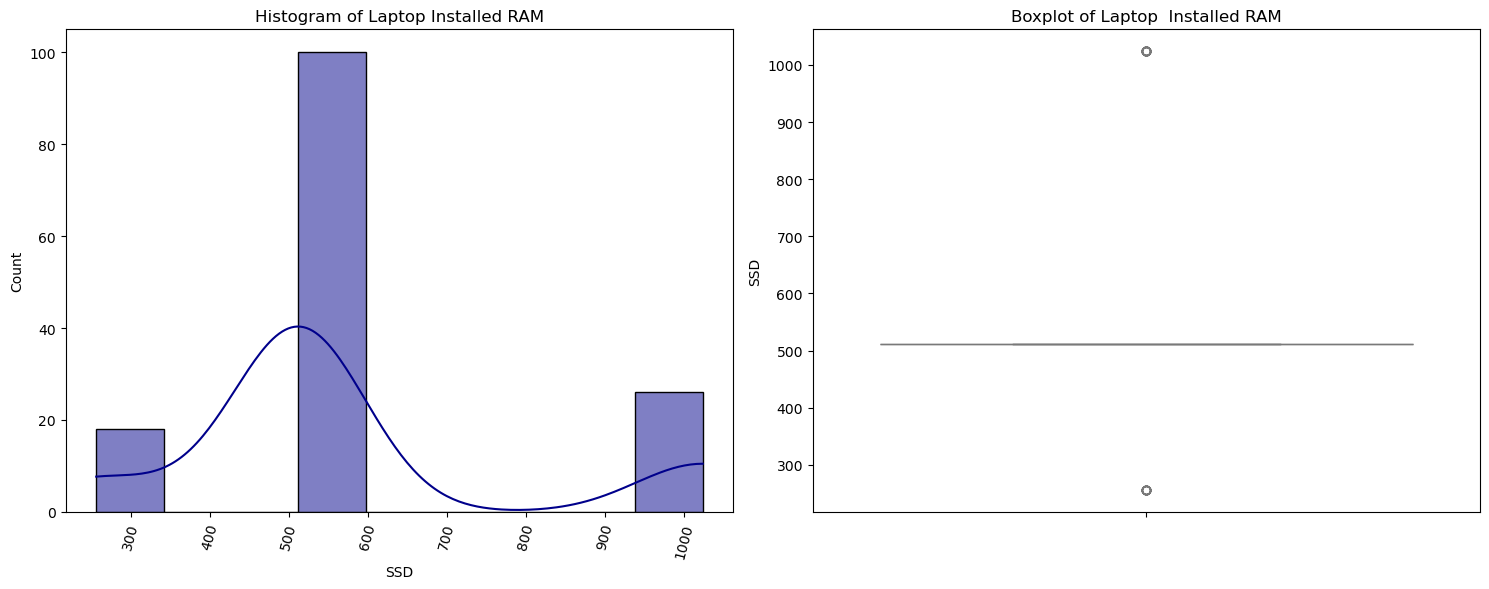

In [232]:
plt.figure(figsize=(15, 6))

# First subplot: Histogram with KDE and styling
plt.subplot(1, 2, 1)
sns.histplot(paklab_data['SSD'], kde=True, color="darkblue",  edgecolor="black" ) # Add edge color for better visualization

plt.xticks(rotation=75, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title('Histogram of Laptop Installed RAM')

# Second subplot: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(paklab_data['SSD'], color="lightblue")  # Add color to the boxplot
plt.title('Boxplot of Laptop  Installed RAM')

plt.tight_layout()
plt.show()


>## Graphic Series

In [233]:
paklab_data['Graphic Series'].unique()

array(['Intel Integrated Graphics', 'Intel Iris Xe Graphics',
       'Intel UHD Graphics', 'AMD Radeon', 'RTX 3050', 'RTX 4050',
       'RTX 4060', 'Intel Arc Graphics', 'MX 550',
       '6-GB NVIDIA GeForce RTX4050'], dtype=object)

In [234]:
paklab_data['Graphic Series'].head(25)


0     Intel Integrated Graphics
1        Intel Iris Xe Graphics
2            Intel UHD Graphics
3     Intel Integrated Graphics
4            Intel UHD Graphics
5            Intel UHD Graphics
6            Intel UHD Graphics
7        Intel Iris Xe Graphics
8        Intel Iris Xe Graphics
9     Intel Integrated Graphics
10       Intel Iris Xe Graphics
11           Intel UHD Graphics
12                   AMD Radeon
13       Intel Iris Xe Graphics
14           Intel UHD Graphics
15       Intel Iris Xe Graphics
16       Intel Iris Xe Graphics
17    Intel Integrated Graphics
18           Intel UHD Graphics
19       Intel Iris Xe Graphics
20       Intel Iris Xe Graphics
21                     RTX 3050
22                     RTX 4050
23                     RTX 4060
24                     RTX 4060
Name: Graphic Series, dtype: object

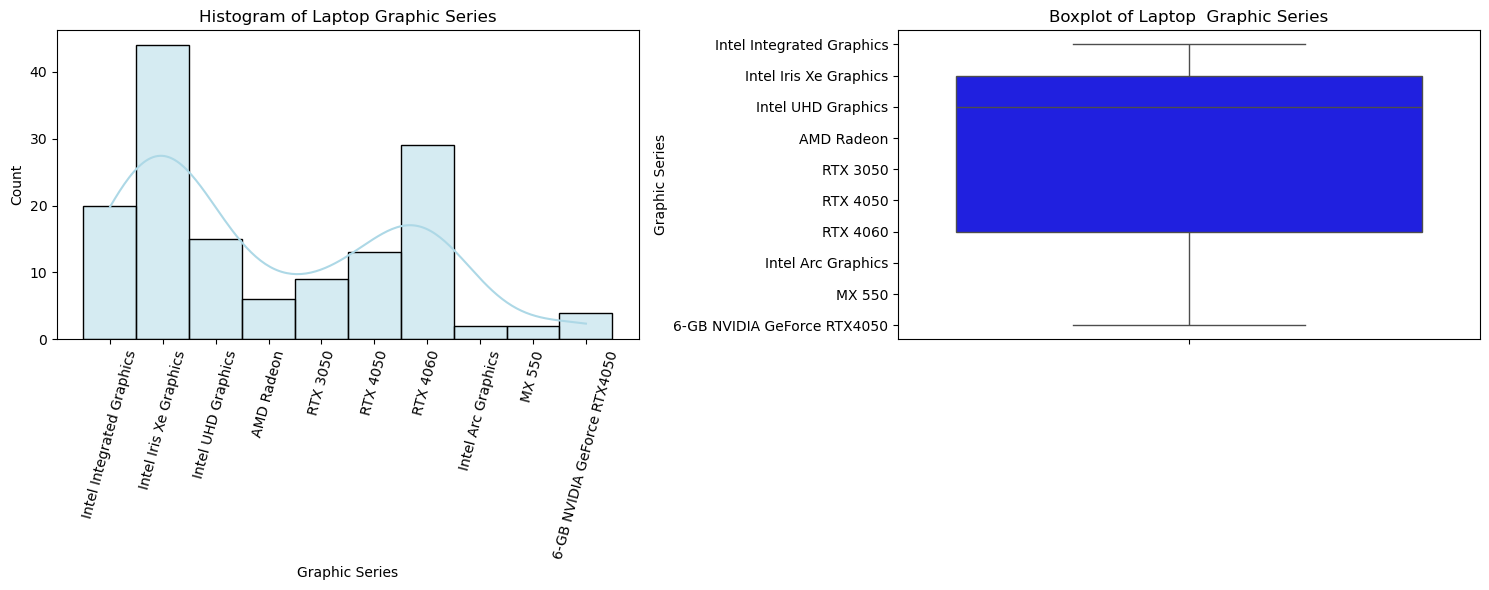

In [235]:
plt.figure(figsize=(15, 6))

# First subplot: Histogram with KDE and styling
plt.subplot(1, 2, 1)
sns.histplot(paklab_data['Graphic Series'], kde=True, color="lightblue",  edgecolor="black" ) # Add edge color for better visualization

plt.xticks(rotation=75, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title('Histogram of Laptop Graphic Series')

# Second subplot: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(paklab_data['Graphic Series'], color="blue")  # Add color to the boxplot
plt.title('Boxplot of Laptop  Graphic Series')

plt.tight_layout()
plt.show()

>## Screen Resolution

In [236]:
paklab_data['Screen Resolution'].unique()

array(['1920x1080', '1920 x 1080', '1920x1200', '1920 X 1080',
       '1920 x 1200', '1920 x 1200 WUXGA', '2880 x 1620', '2560x1600',
       '2880 X 1920 (267 PPI)', '3200x2000', '3840x2400'], dtype=object)

In [237]:
paklab_data['Screen Resolution'].head(30)

0       1920x1080
1       1920x1080
2       1920x1080
3       1920x1080
4       1920x1080
5       1920x1080
6       1920x1080
7       1920x1080
8     1920 x 1080
9       1920x1080
10      1920x1080
11      1920x1080
12    1920 x 1080
13      1920x1080
14      1920x1080
15      1920x1080
16      1920x1080
17      1920x1080
18      1920x1080
19      1920x1080
20      1920x1080
21      1920x1080
22      1920x1080
23    1920 x 1080
24      1920x1080
25    1920 x 1080
26      1920x1080
27    1920 x 1080
28      1920x1080
29      1920x1080
Name: Screen Resolution, dtype: object

In [238]:

def extract_GPUs(text):
    if isinstance(text, str):

        cleaned_GPUs = re.sub(r'\s*(WUXGA|\s*\(.*\)|\d\*\()\s*', '', text.strip(),flags=re.IGNORECASE)
        cleaned_GPUs = re.sub(r'\s*\(.*\)', '', cleaned_GPUs)
        
        cleaned_GPUs = re.sub(r'(\s*x\s*|\s*X\s*)', 'x', cleaned_GPUs)
    


        return cleaned_GPUs.strip() 
    return text

paklab_data['Screen Resolution'] = paklab_data['Screen Resolution'].apply(extract_GPUs)

paklab_data['Screen Resolution']


0      1920x1080
1      1920x1080
2      1920x1080
3      1920x1080
4      1920x1080
         ...    
139    1920x1080
140    1920x1200
141    2560x1600
142    2560x1600
143    3200x2000
Name: Screen Resolution, Length: 144, dtype: object

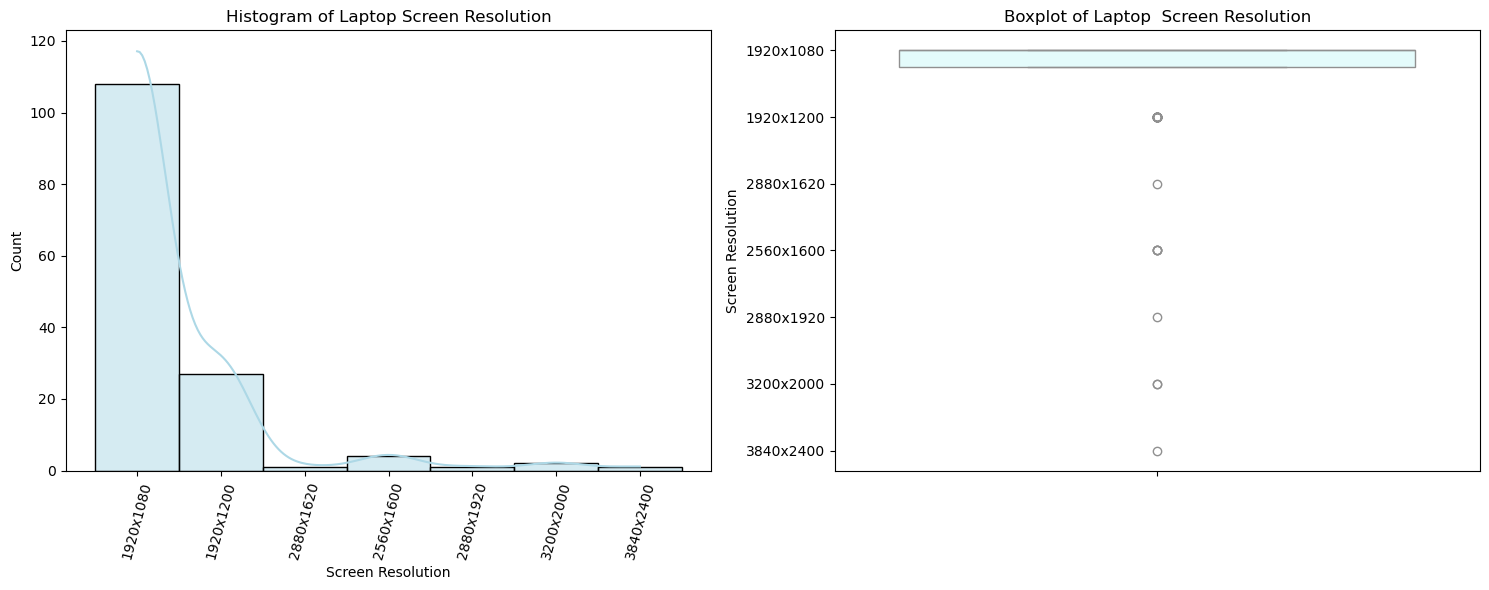

In [239]:
plt.figure(figsize=(15, 6))

# First subplot: Histogram with KDE and styling
plt.subplot(1, 2, 1)
sns.histplot(paklab_data['Screen Resolution'], kde=True, color="lightblue",  edgecolor="black" ) # Add edge color for better visualization

plt.xticks(rotation=75, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title('Histogram of Laptop Screen Resolution')

# Second subplot: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(paklab_data['Screen Resolution'], color="lightCyan")  # Add color to the boxplot
plt.title('Boxplot of Laptop  Screen Resolution')

plt.tight_layout()
plt.show()

>## Touch Screen

In [240]:
paklab_data['TouchScreen'].unique()

array(['No', 'Yes', 'Touch Screen (10-point multi-touch)',
       '10-point Multi-touch', 'OGM, 10-point Multi-touch'], dtype=object)

In [241]:
paklab_data['TouchScreen'].head(30)


0                                      No
1                                      No
2                                      No
3                                      No
4                                      No
5                                      No
6                                      No
7                                      No
8                                      No
9                                      No
10                                    Yes
11                                     No
12                                     No
13                                     No
14                                     No
15                                     No
16                                     No
17                                     No
18                                     No
19                                     No
20                                     No
21                                     No
22                                     No
23                                

In [242]:


paklab_data['TouchScreen'] = paklab_data['TouchScreen'].replace(['Touch Screen (10-point multi-touch)','10-point Multi-touch','OGM, 10-point Multi-touch'],'Yes')
paklab_data['TouchScreen'].head(30)

0      No
1      No
2      No
3      No
4      No
5      No
6      No
7      No
8      No
9      No
10    Yes
11     No
12     No
13     No
14     No
15     No
16     No
17     No
18     No
19     No
20     No
21     No
22     No
23     No
24     No
25     No
26     No
27     No
28    Yes
29     No
Name: TouchScreen, dtype: object

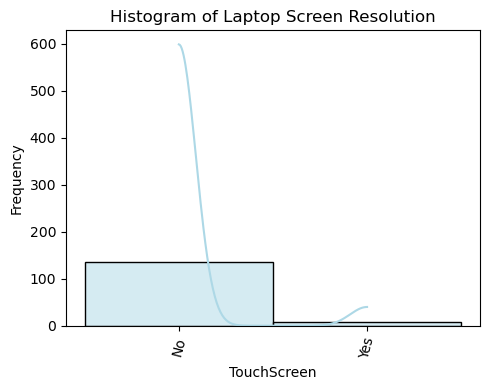

In [243]:
plt.figure(figsize=(5, 4))

# First subplot: Histogram with KDE and styling
sns.histplot(paklab_data['TouchScreen'], kde=True, color="lightblue",  edgecolor="black" ) # Add edge color for better visualization
plt.xticks(rotation=75, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.ylabel('Frequency')

plt.title('Histogram of Laptop Screen Resolution')
plt.tight_layout()
plt.show()

>## Color

In [244]:
paklab_data['Color'].unique()

array(['Grey', 'Black', 'Silver', 'White', 'Blue', 'Sky Color',
       'Platinum Silver'], dtype=object)

In [245]:
paklab_data['Color'].head(25)

0       Grey
1      Black
2     Silver
3       Grey
4      Black
5      Black
6     Silver
7      Black
8      Black
9      Black
10      Grey
11    Silver
12     Black
13    Silver
14     Black
15    Silver
16     Black
17      Grey
18    Silver
19     Black
20    Silver
21     Black
22     Black
23      Grey
24      Grey
Name: Color, dtype: object

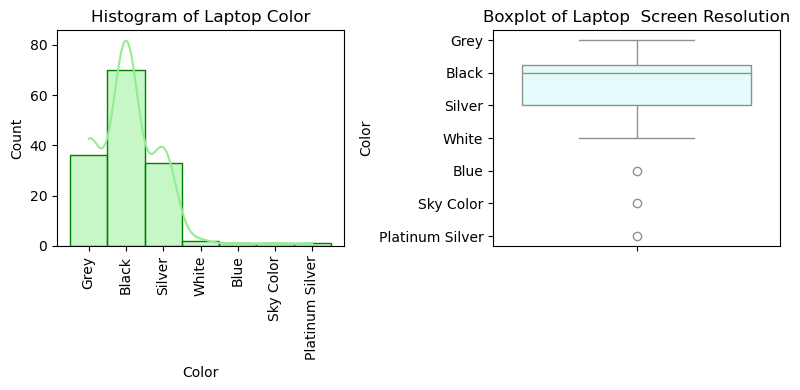

In [246]:
plt.figure(figsize=(8, 4))

# First subplot: Histogram with KDE and styling
plt.subplot(1, 2, 1)
sns.histplot(paklab_data['Color'], kde=True, color="lightgreen",  edgecolor="green" ) # Add edge color for better visualization
plt.xticks(rotation=90, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title('Histogram of Laptop Color')


# Second subplot: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(paklab_data['Color'], color="lightCyan")  # Add color to the boxplot
plt.title('Boxplot of Laptop  Screen Resolution')

plt.tight_layout()
plt.show()

<!-- , 'Weight', 'Finger Print Reader', 'Backlit keyboard', 'Bluetooth', 'LAN', 'Wireless/WIFI', 'Type', 'Condition', 'USB', 'HDMI' -->

>## Weight

In [247]:
paklab_data['Weight'].unique()

array(['1.62 kg (3.57 lbs)', 'Starting weight: 3.65 lbs. (1.66 kg)',
       '1.59 kg', 'Starting at 1.62 kg (3.57 lbs)', '1.65 kg (3.64 lbs)',
       'Starting at 1.52 kg', '1.69 kg (3.73 lbs)',
       'Starting at 1.7 kg (3.75 lbs)', '2.75 lbs. (1.25 kg)',
       '1.64 kg (3.62 lbs)', 'Unpackaged: 5.06 lb • Packaged: 7.39 lb',
       '4.66 lb', '2.81 kg (6.19 lb)', '2.3 KG', '5.24 LBS',
       'Starting at 1.78 kg (3.92 lbs)', '1.63 kg (3.59 lb)', '608 g',
       '3.99 lbs. (1.81 kg)', 'Starting at 1.38 kg (3.04 lbs)',
       '1.61 kg (3.55 lbs)', '1.7 kg (3.75 lbs)', '1.74 kg',
       '4.28 lb (1.94 kg)', 'Unpackaged: 5.06 lb• Packaged: 7.39 lb',
       '1.52 KG', '1.38 kg (3.04 lbs)', 'Starting at 1.74 kg',
       '1.59 kg (3.51 lbs)', '1.67 kg (3.68 lbs)', 'Starting at 1.39 kg',
       '2.29 kg', '1.81 kg (3.99 lbs)', '1.43 kg (3.15 lbs)',
       '1.44 kg (3.17 lbs)', '4.14 lb', '1.5 kg (3.31 lbs)',
       '2.38 kg (5.25 lbs)', 'Starting at 1.478 kg (3.26 lbs)',
       '1.80 kg (3.

In [248]:
paklab_data['Weight'].head(30)


0                          1.62 kg (3.57 lbs)
1        Starting weight: 3.65 lbs. (1.66 kg)
2                                     1.59 kg
3              Starting at 1.62 kg (3.57 lbs)
4                          1.65 kg (3.64 lbs)
5                          1.65 kg (3.64 lbs)
6                         Starting at 1.52 kg
7        Starting weight: 3.65 lbs. (1.66 kg)
8                          1.69 kg (3.73 lbs)
9               Starting at 1.7 kg (3.75 lbs)
10                        2.75 lbs. (1.25 kg)
11                                    1.59 kg
12                         1.64 kg (3.62 lbs)
13                        Starting at 1.52 kg
14                         1.65 kg (3.64 lbs)
15                                    1.59 kg
16       Starting weight: 3.65 lbs. (1.66 kg)
17                         1.62 kg (3.57 lbs)
18                                    1.59 kg
19       Starting weight: 3.65 lbs. (1.66 kg)
20                        Starting at 1.52 kg
21    Unpackaged: 5.06 lb • Packag

In [249]:

# Function to extract text after "I" followed by a digit
def extract_floets_point_Processor_speed(text):
    if isinstance(text, str):  # Ensure it's a string
        # Use regex to find "I" followed by a digit and the rest of the text
        match = re.search(r'\d+\.\d+\s', text)  # Case-insensitive match for "I"
        if match:
            return match.group()  # Return the matched text
    return text  # Return the original value if no match is found or not a string

# Example usage
paklab_data['Weight'] = paklab_data['Weight'].apply(extract_floets_point_Processor_speed)
paklab_data['Weight'].head(30)

0     1.62 
1     3.65 
2     1.59 
3     1.62 
4     1.65 
5     1.65 
6     1.52 
7     3.65 
8     1.69 
9      1.7 
10    2.75 
11    1.59 
12    1.64 
13    1.52 
14    1.65 
15    1.59 
16    3.65 
17    1.62 
18    1.59 
19    3.65 
20    1.52 
21    5.06 
22    4.66 
23    2.81 
24     2.3 
25    5.24 
26    1.78 
27    1.63 
28    608 g
29    3.99 
Name: Weight, dtype: object

In [250]:
paklab_data['Weight'].unique()


array(['1.62 ', '3.65 ', '1.59 ', '1.65 ', '1.52 ', '1.69 ', '1.7 ',
       '2.75 ', '1.64 ', '5.06 ', '4.66 ', '2.81 ', '2.3 ', '5.24 ',
       '1.78 ', '1.63 ', '608 g', '3.99 ', '1.38 ', '1.61 ', '1.74 ',
       '4.28 ', '1.67 ', '1.39 ', '2.29 ', '1.81 ', '1.43 ', '1.44 ',
       '4.14 ', '1.5 ', '2.38 ', '1.478 ', '1.80 ', '2.59 ', '2.31 ',
       '2.80 ', '6.3 ', '2.36 ', '1.94 ', '4.41 ', '1.32 '], dtype=object)

In [251]:


paklab_data['Weight'] =paklab_data['Weight'].str.replace(' g', '')


paklab_data['Weight']

0      1.62 
1      3.65 
2      1.59 
3      1.62 
4      1.65 
       ...  
139    2.31 
140    2.80 
141     6.3 
142    2.36 
143    4.41 
Name: Weight, Length: 144, dtype: object

In [252]:
paklab_data['Weight'].unique()


array(['1.62 ', '3.65 ', '1.59 ', '1.65 ', '1.52 ', '1.69 ', '1.7 ',
       '2.75 ', '1.64 ', '5.06 ', '4.66 ', '2.81 ', '2.3 ', '5.24 ',
       '1.78 ', '1.63 ', '608', '3.99 ', '1.38 ', '1.61 ', '1.74 ',
       '4.28 ', '1.67 ', '1.39 ', '2.29 ', '1.81 ', '1.43 ', '1.44 ',
       '4.14 ', '1.5 ', '2.38 ', '1.478 ', '1.80 ', '2.59 ', '2.31 ',
       '2.80 ', '6.3 ', '2.36 ', '1.94 ', '4.41 ', '1.32 '], dtype=object)

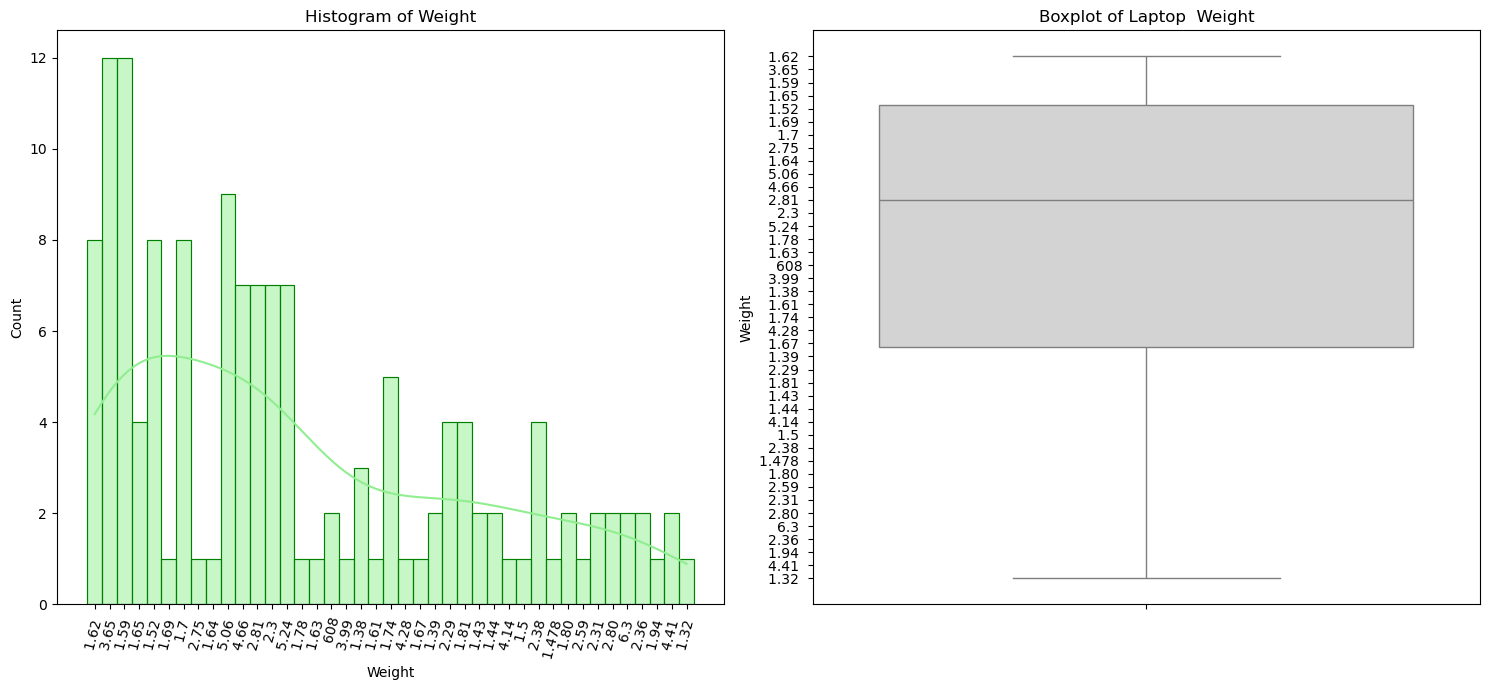

In [253]:
plt.figure(figsize=(15, 7))

# First subplot: Histogram with KDE and styling
plt.subplot(1, 2, 1)
sns.histplot(paklab_data['Weight'], kde=True, color="lightgreen",  edgecolor="green" ) # Add edge color for better visualization
plt.xticks(rotation=75, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title('Histogram of Weight')


# Second subplot: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(paklab_data['Weight'], color="lightGray")  # Add color to the boxplot
plt.title('Boxplot of Laptop  Weight')

plt.tight_layout()
plt.show()

>## Finger print Reader

In [254]:
paklab_data['Finger Print Reader'].unique()

array(['No', '-', 'Yes', 'Touch Style, Integrated in Power Button',
       'Built-in Fingerprint Sensor',
       'Carbon Black Palmrest without Finger Print Reader',
       'Touch Style, Match-on-Chip, Integrated in Power Button',
       'Fingerprint sensor', 'Touch Style', 'Touch Style, on Palm Rest',
       'Touch Style, on Keyboard'], dtype=object)

In [255]:
paklab_data['Finger Print Reader'].head(30)


0                                          No
1                                          No
2                                          No
3                                          No
4                                          No
5                                          No
6                                           -
7                                          No
8                                         Yes
9                                          No
10                                         No
11                                         No
12                                         No
13                                          -
14                                         No
15                                         No
16                                         No
17                                         No
18                                         No
19                                         No
20                                          -
21                                

In [256]:
paklab_data['Finger Print Reader'] = paklab_data['Finger Print Reader'].replace(['Touch Style, Integrated in Power Button',
                                                                 'Built-in Fingerprint Sensor','Carbon Black Palmrest without Finger Print Reader',
                                                                'Touch Style, Match-on-Chip, Integrated in Power Button',
                                                                'Fingerprint sensor', 'Touch Style', 'Touch Style, on Palm Rest',
                                                                'Touch Style, on Keyboard' ],'Yes')

paklab_data['Finger Print Reader'] = paklab_data['Finger Print Reader'].replace(['-'],'No')

paklab_data['Finger Print Reader'].head(30)


0      No
1      No
2      No
3      No
4      No
5      No
6      No
7      No
8     Yes
9      No
10     No
11     No
12     No
13     No
14     No
15     No
16     No
17     No
18     No
19     No
20     No
21     No
22     No
23     No
24     No
25     No
26    Yes
27     No
28    Yes
29    Yes
Name: Finger Print Reader, dtype: object

In [257]:
paklab_data['Finger Print Reader'].unique()


array(['No', 'Yes'], dtype=object)

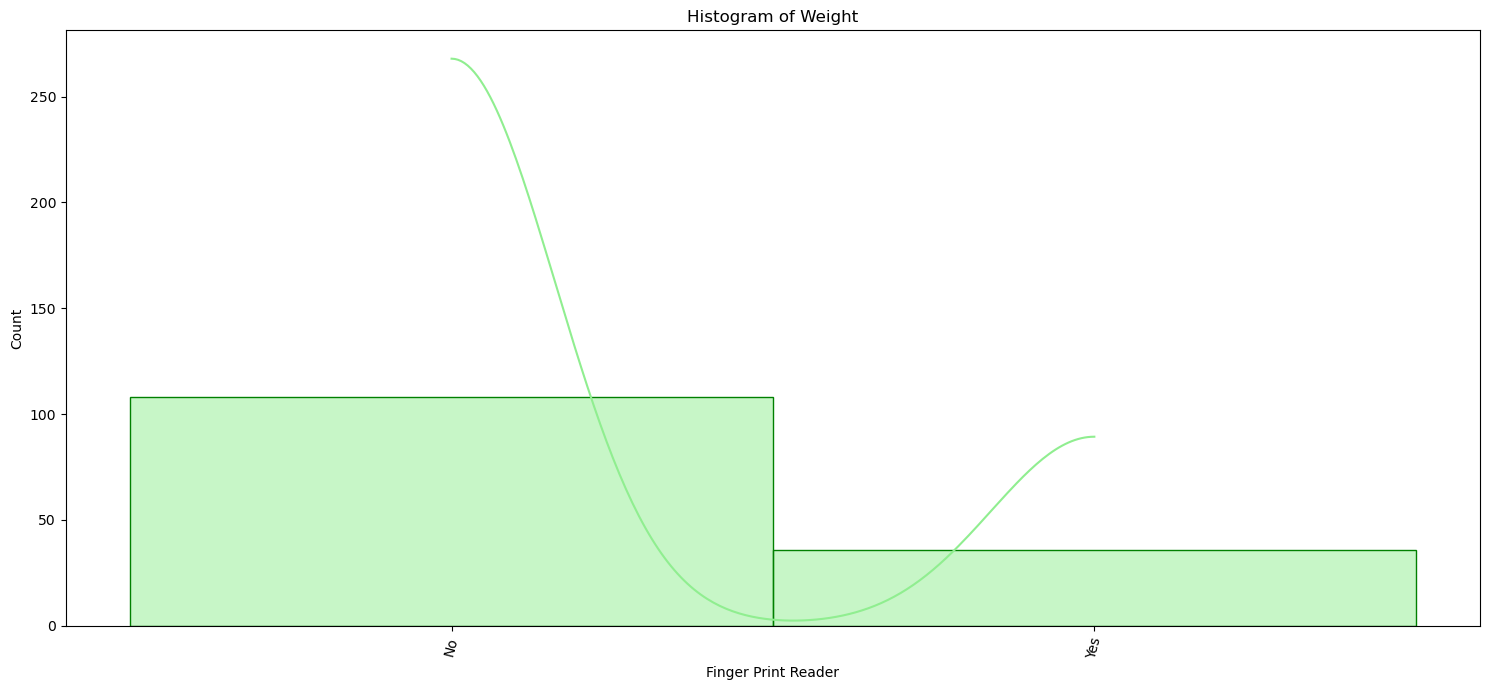

In [258]:
plt.figure(figsize=(15, 7))

sns.histplot(paklab_data['Finger Print Reader'], kde=True, color="lightgreen",  edgecolor="green" ) # Add edge color for better visualization
plt.xticks(rotation=75, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title('Histogram of Weight')



plt.tight_layout()
plt.show()

>## Backlit keyboard

In [259]:
paklab_data['Backlit keyboard'].unique()

array(['Yes',
       'HP Premium Keyboard – spill-resistant, backlit keyboard with numeric keypad',
       'No', 'Full-size, soft grey keyboard with numeric keypad',
       'English International Non-Backlit Keyboard with Numeric Keypad'],
      dtype=object)

In [260]:
paklab_data['Backlit keyboard'].head(30)


0                                                   Yes
1                                                   Yes
2                                                   Yes
3                                                   Yes
4                                                   Yes
5                                                   Yes
6     HP Premium Keyboard – spill-resistant, backlit...
7                                                   Yes
8                                                   Yes
9                                                   Yes
10                                                   No
11                                                  Yes
12                                                   No
13                                                  Yes
14                                                  Yes
15    Full-size, soft grey keyboard with numeric keypad
16                                                  Yes
17                                              

In [261]:
paklab_data['Backlit keyboard'] = paklab_data['Backlit keyboard'].replace([ 'HP Premium Keyboard – spill-resistant, backlit keyboard with numeric keypad','Full-size, soft grey keyboard with numeric keypad',
       'English International Non-Backlit Keyboard with Numeric Keypad' ],'Yes')



In [262]:
paklab_data['Backlit keyboard'].unique()

array(['Yes', 'No'], dtype=object)

In [263]:
new_count = paklab_data[paklab_data['Backlit keyboard'] == 'Yes'].shape[0]
open_box_count = paklab_data[paklab_data['Backlit keyboard'] == 'No'].shape[0]

print(f"Number of 'Yes' conditions: {new_count}")
print(f"Number of 'No' conditions: {open_box_count}")

Number of 'Yes' conditions: 110
Number of 'No' conditions: 34


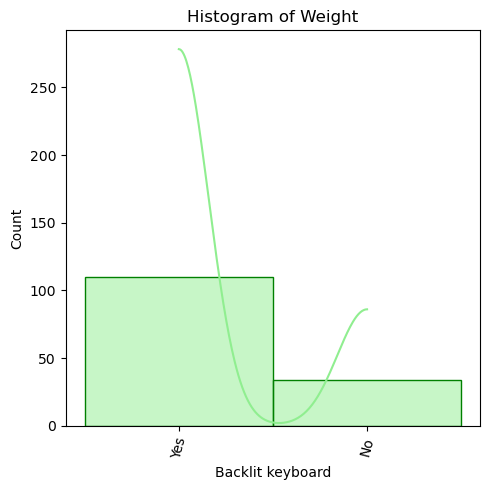

In [264]:
plt.figure(figsize=(5, 5))

# First subplot: Histogram with KDE and styling

sns.histplot(paklab_data['Backlit keyboard'], kde=True, color="lightgreen",  edgecolor="green" ) # Add edge color for better visualization
plt.xticks(rotation=75, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title('Histogram of Weight')



plt.tight_layout()
plt.show()

> ## LAN

In [265]:
paklab_data['LAN'].unique()

array(['No', 'Yes', 'RJ-45', 'No Onboard Ethernet', 'NO'], dtype=object)

In [266]:
paklab_data['LAN'].head(140)

0         No
1        Yes
2         No
3         No
4        Yes
       ...  
135      Yes
136      Yes
137      Yes
138    RJ-45
139      Yes
Name: LAN, Length: 140, dtype: object

In [267]:
paklab_data['LAN'] = paklab_data['LAN'].replace(['RJ-45'],'Yes')
paklab_data['LAN'] = paklab_data['LAN'].replace(['NO'],'No')
paklab_data['LAN'] = paklab_data['LAN'].replace(['No Onboard Ethernet'],'No')

paklab_data['LAN'].head(140)



0       No
1      Yes
2       No
3       No
4      Yes
      ... 
135    Yes
136    Yes
137    Yes
138    Yes
139    Yes
Name: LAN, Length: 140, dtype: object

In [268]:
new_count = paklab_data[paklab_data['LAN'] == 'Yes'].shape[0]
open_box_count = paklab_data[paklab_data['LAN'] == 'No'].shape[0]

print(f"Number of 'Yes' conditions: {new_count}")
print(f"Number of 'No' conditions: {open_box_count}")

Number of 'Yes' conditions: 101
Number of 'No' conditions: 43


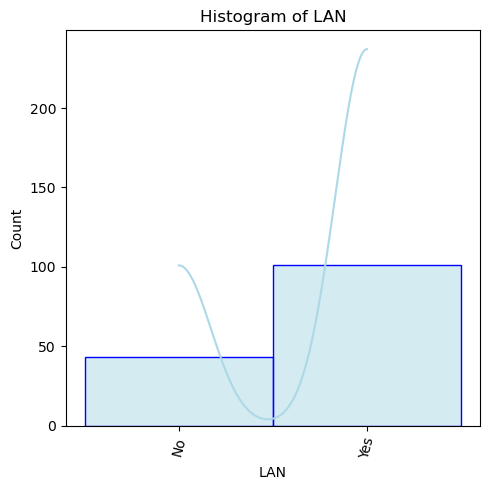

In [269]:
plt.figure(figsize=(5, 5))

# First subplot: Histogram with KDE and styling

sns.histplot(paklab_data['LAN'], kde=True, color="lightblue",  edgecolor="blue" ) # Add edge color for better visualization
plt.xticks(rotation=75, ha='center', va='top', fontsize=10)  # Adjust alignment
plt.title('Histogram of LAN')



plt.tight_layout()
plt.show()

In [270]:
print(list(paklab_data))

['Price', 'Brand', 'Processor Generation', 'Processor Type', 'Processor Speed', 'Installed RAM', 'SSD', 'Graphic Series', 'Screen Resolution', 'TouchScreen', 'Color', 'Weight', 'Finger Print Reader', 'Backlit keyboard', 'LAN']


In [271]:
paklab_data

,Price,Brand,Processor Generation,Processor Type,Processor Speed,Installed RAM,SSD,Graphic Series,Screen Resolution,TouchScreen,Color,Weight,Finger Print Reader,Backlit keyboard,LAN
0,229000,Lenovo,13th Generation,Intel Core i3,1.6,8,256,Intel Integrated Graphics,1920x1080,No,Grey,1.62,No,Yes,No
1,559000,Dell,12th Generation,Intel Core i3,1.2,8,512,Intel Iris Xe Graphics,1920x1080,No,Black,3.65,No,Yes,Yes
2,649000,Hp,13th Generation,Intel Core i3,1.2,4,256,Intel UHD Graphics,1920x1080,No,Silver,1.59,No,Yes,No
3,699000,Lenovo,13th Generation,Intel Core i3,1.6,8,256,Intel Integrated Graphics,1920x1080,No,Grey,1.62,No,Yes,No
4,699000,Lenovo,13th Generation,Intel Core i3,1.2,8,256,Intel UHD Graphics,1920x1080,No,Black,1.65,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,277000,Hp,13th Generation,Intel Core i7,2.1,16,512,RTX 4060,1920x1080,No,Black,2.31,No,Yes,Yes
140,287000,Acer,14th Generation,Intel Core i9,2.2,16,1024,RTX 4060,1920x1200,No,Black,2.80,No,Yes,Yes
141,287000,Dell,13th Generation,Intel Core i9,2.2,16,1024,RTX 4060,2560x1600,No,Silver,6.3,No,No,Yes
142,305000,Lenovo,14th Generation,Intel Core i9,5.8,32,1024,RTX 4060,2560x1600,No,Black,2.36,No,Yes,Yes


In [ ]:
# paklab_data.to_csv('PakLab_Final_data.csv',index=False,header=True)